In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
bank_assets_df = pd.read_csv("bankAssetWeightedNetwork.csv", header=None)
interbank_exposures_df = pd.read_csv("interbankExposures.csv", header=None)
bank_equities_df = pd.read_csv("bankEquities.csv", header=None)

In [7]:
bank_equities_df

,Equity,Bank
0,465710.0,0
1,4436.7,1
2,13159.0,2
3,16229000.0,3
4,438420.0,4
...,...,...
140,11382000.0,140
141,14033000.0,141
142,129430.0,142
143,874880.0,143


In [25]:
interbank_exposures_df

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96450.0,0.0,0.0,0.0,97484.0,149400.0,1192900.0,7327900.0,89233.0,76598.0,...,0.0,6388900.0,38878.0,107500.0,0.0,5451800.0,5357400.0,38829.0,303010.0,1552800.0
4,0.0,0.0,0.0,52808.0,0.0,0.0,9576.7,0.0,0.0,0.0,...,0.0,51289.0,0.0,0.0,0.0,43767.0,43009.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,24321.0,0.0,6805.7,1658800.0,24582.0,37674.0,300820.0,1847900.0,0.0,19316.0,...,0.0,1611100.0,9803.6,27108.0,0.0,0.0,1351000.0,0.0,76409.0,391570.0
141,55454.0,0.0,0.0,3782100.0,0.0,0.0,685880.0,4213200.0,51304.0,44040.0,...,0.0,3673300.0,0.0,0.0,0.0,3134500.0,0.0,22325.0,174210.0,892800.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34430.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25615.0,25171.0,0.0,0.0,0.0
143,0.0,0.0,0.0,36719.0,0.0,0.0,0.0,40904.0,0.0,0.0,...,0.0,35662.0,0.0,0.0,0.0,30432.0,29905.0,0.0,0.0,0.0


In [41]:
bank_total_assets = bank_assets_df.sum(axis=1)

In [42]:
bank_total_assets

0        2154600.0
1          29473.2
2         156460.0
3      343060000.0
4        1846500.0
          ...     
140    301110000.0
141    286542000.0
142      1215600.0
143     15375200.0
144     84110000.0
Length: 145, dtype: float64

In [8]:
degrees = interbank_exposures_df.astype(bool).sum(axis=1)

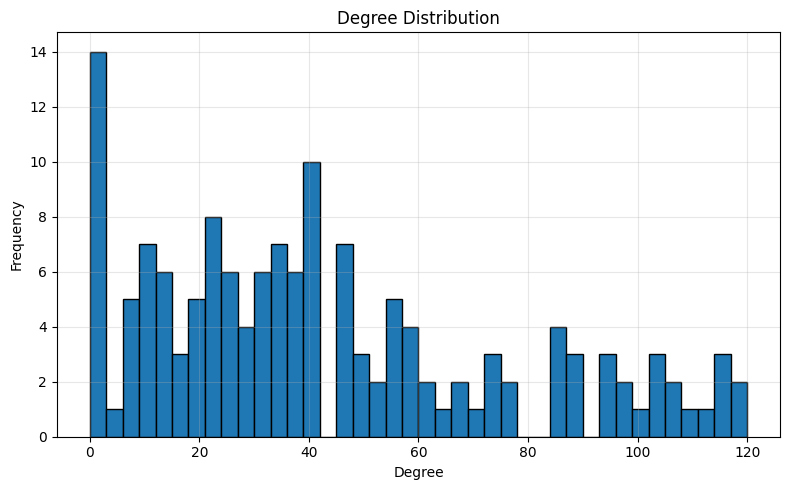

In [58]:
# Plot 1: Histogram of degree distribution
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=40, edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/degree_distribution.png')
plt.show()

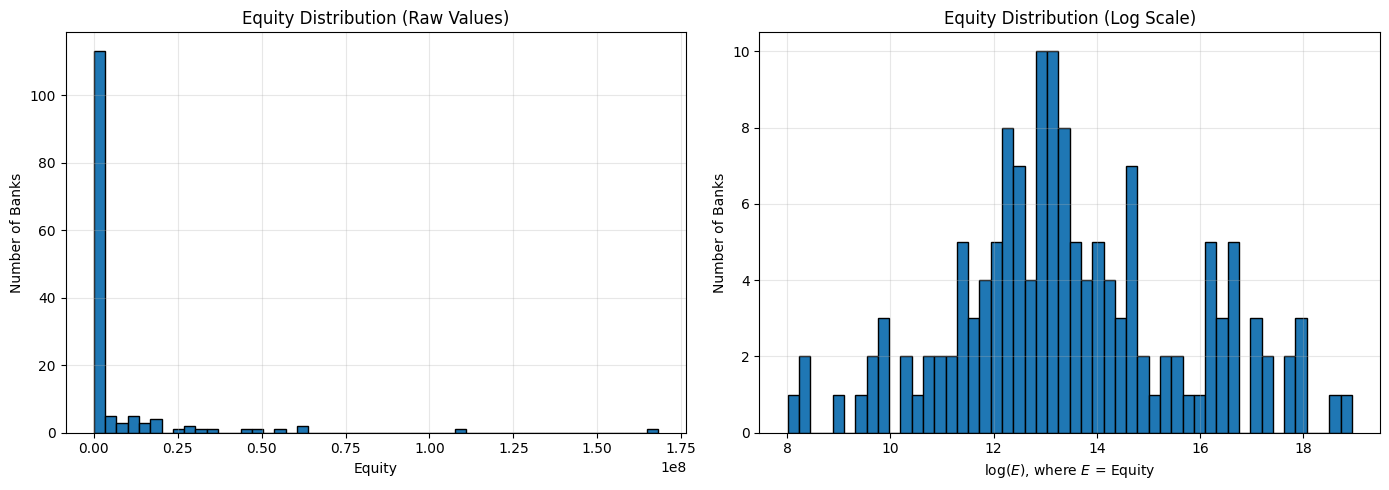

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(bank_equities_df['Equity'], bins=50, edgecolor='black')
axes[0].set_title('Equity Distribution (Raw Values)')
axes[0].set_xlabel('Equity')
axes[0].set_ylabel('Number of Banks')
axes[0].grid(True, alpha=0.3)

axes[1].hist(np.log(bank_equities_df['Equity']), bins=50, edgecolor='black')
axes[1].set_title('Equity Distribution (Log Scale)')
axes[1].set_xlabel('$\\log(E)$, where $E$ = Equity')
axes[1].set_ylabel('Number of Banks')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/equity_distribution.png')
plt.show()

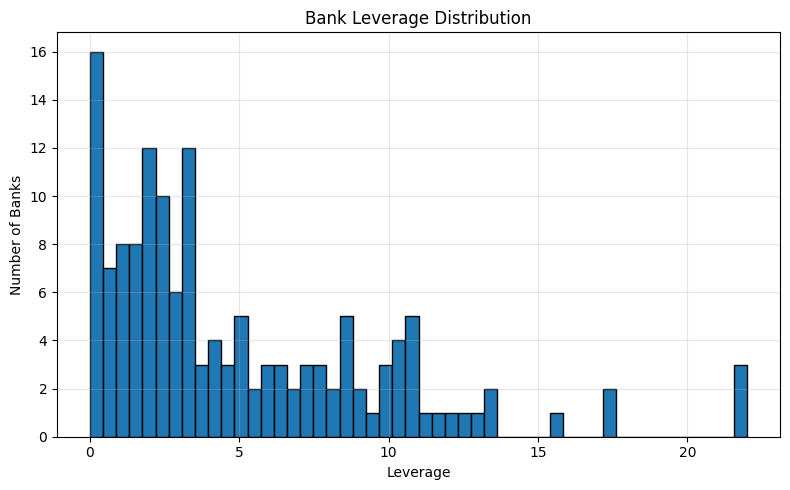

In [ ]:
interbank_assets = interbank_exposures_df.sum(axis=1)
leverage = interbank_assets / bank_equities_df['Equity'].replace(0, np.nan)

plt.figure(figsize=(8, 5))
plt.hist(leverage.dropna(), bins=50, edgecolor='black')
plt.title('Bank Leverage Distribution')
plt.xlabel('Leverage')
plt.ylabel('Number of Banks')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/leverage_distribution.png')
plt.show()

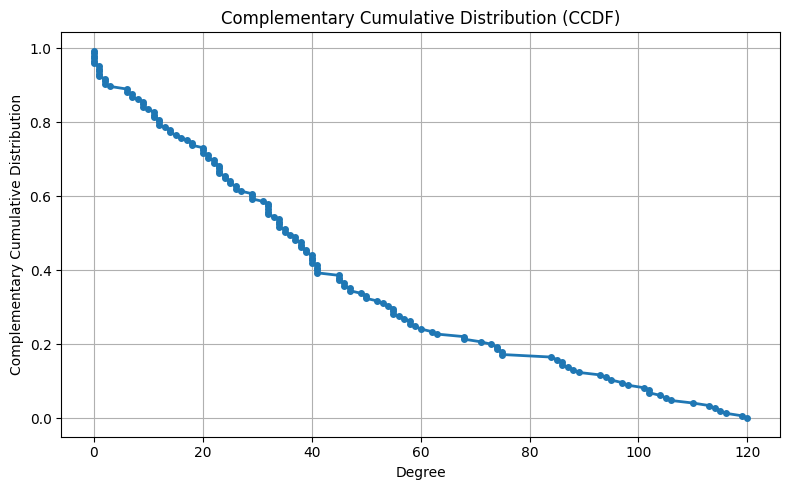

In [60]:
sorted_degrees = np.sort(degrees)
ccdf = 1.0 - np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)

# Plot CCDF of degree distribution with a thick line connecting the points
plt.figure(figsize=(8, 5))
plt.plot(sorted_degrees, ccdf, marker='o', linestyle='-', linewidth=2, markersize=4)
plt.title('Complementary Cumulative Distribution (CCDF)')
plt.xlabel('Degree')
plt.ylabel('Complementary Cumulative Distribution')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/ccdf_degree.png')
plt.show()

In [68]:
E0 = bank_equities_df.set_index('Bank')['Equity'].values.copy()  # Equity vector
A = interbank_exposures_df.values.copy()                         # Interbank exposure matrix
S = bank_assets_df.values.copy() 

In [65]:
print("Equity:", E0.shape)
print("Exposure Matrix (A):", A.shape)
print("Asset Matrix (S):", S.shape)


Equity: (145,)
Exposure Matrix (A): (145, 145)
Asset Matrix (S): (145, 20)


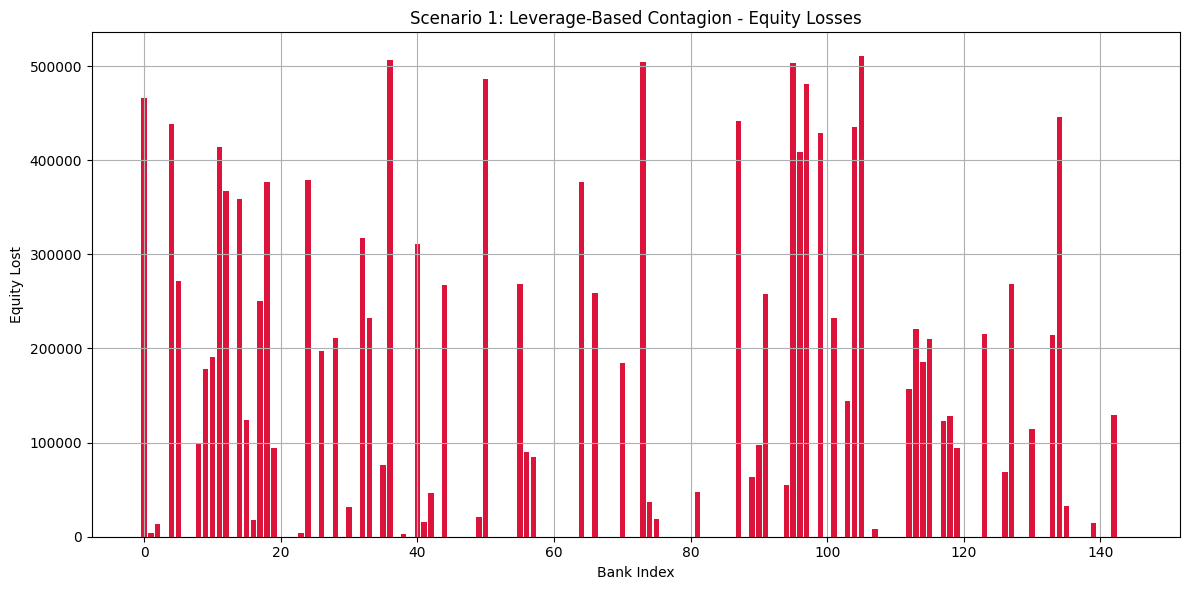

🔺 Affected Banks: 72 / 145
📉 Total Equity Lost: 1.53e+07


In [ ]:
def simulate_leverage_contagion(A, E0, threshold=0.5):
    n_banks = len(E0)
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)

    equity_losses = np.zeros(n_banks)
    contagion = np.zeros(n_banks, dtype=bool)

    leverage_threshold = np.percentile(E0, threshold * 100)
    initial = np.where(E0 < leverage_threshold)[0]

    for bank in initial:
        contagion[bank] = True
        equity_losses[bank] = E0[bank]  

    for step in range(10):  
        new_contagion = contagion.copy()
        for i in range(n_banks):
            if contagion[i]:
                for j in G.successors(i):
                    if not contagion[j]:
                        loss_fraction = A[i][j] / E0[j] if E0[j] > 0 else 1
                        if loss_fraction > 0.1: 
                            new_contagion[j] = True
                            equity_losses[j] = E0[j] * 0.5
        if np.array_equal(new_contagion, contagion):
            break  
        contagion = new_contagion

    return equity_losses, contagion

equity_losses, contagion = simulate_leverage_contagion(A, E0, threshold=0.5)

plt.figure(figsize=(12, 6))
plt.bar(range(len(E0)), equity_losses, color='crimson')
plt.title("Scenario 1: Leverage-Based Contagion - Equity Losses")
plt.xlabel("Bank Index")
plt.ylabel("Equity Lost")
plt.grid(True)
plt.tight_layout()
plt.show()

affected_banks = np.where(contagion)[0]
print(f"Affected Banks: {len(affected_banks)} / {len(E0)}")
print(f"Total Equity Lost: {equity_losses.sum():.2e}")

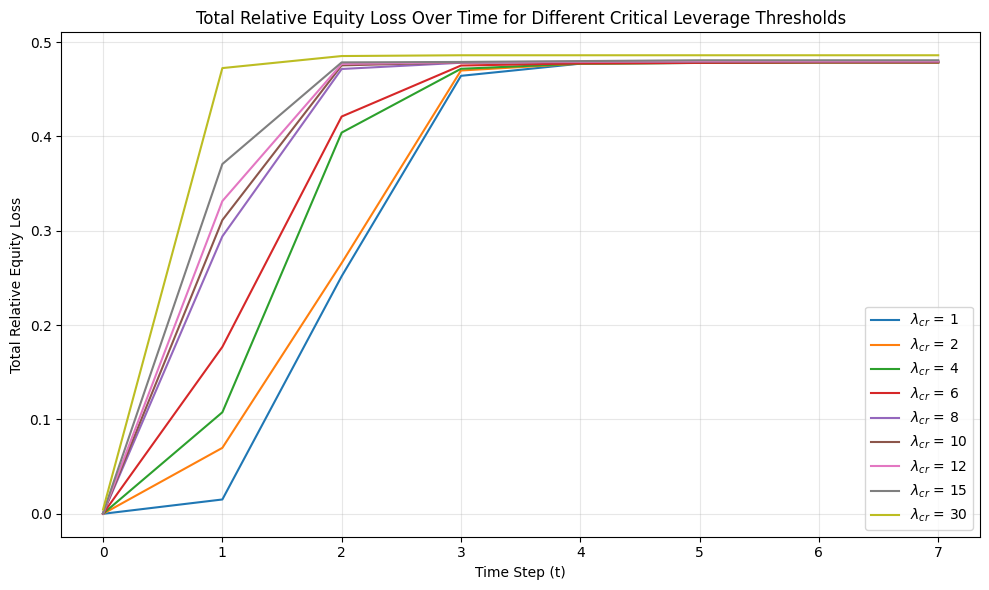

In [ ]:
def contagion_over_time(A, E0, leverage_threshold_percentile):
    n_banks = len(E0)
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    E_init = E0.copy()

    W = np.divide(A, E0[:, np.newaxis], where=E0[:, np.newaxis] > 0)

    history = []
    equity = E0.copy()
    active = np.zeros(n_banks, dtype=bool)

    threshold = np.percentile(E0, leverage_threshold_percentile)
    initial = np.where(E0 < threshold)[0]
    active[initial] = True
    equity[initial] = 0
    history.append(1 - equity.sum() / E_init.sum())

    for t in range(1, 8):
        new_active = active.copy()
        new_equity = equity.copy()

        for i in range(n_banks):
            if not active[i]:
                impact = 0
                for j in G.predecessors(i):
                    if E_init[j] > 0:
                        shock_fraction = 1 - equity[j] / E_init[j]
                        impact += W[j, i] * shock_fraction
                if impact > 0.1:
                    new_active[i] = True
                    new_equity[i] *= 0.5

        equity = new_equity
        active = new_active
        history.append(1 - equity.sum() / E_init.sum())

    return history

thresholds = [1, 2, 4, 6, 8, 10, 12, 15, 30]
results = {th: contagion_over_time(A, E0, th) for th in thresholds}

plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.plot(range(8), results[th], label=f"$\\lambda_{{cr}}$ = {th}")

plt.title("Total Relative Equity Loss Over Time for Different Critical Leverage Thresholds")
plt.xlabel("Time Step (t)")
plt.ylabel("Total Relative Equity Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/scenario1.png')

In [82]:
def stress_central_node(A, E0, alpha, central_bank=82):
    n_banks = len(E0)
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    E_init = E0.copy()

    W = np.divide(A, E0[:, np.newaxis], where=E0[:, np.newaxis] > 0)

    history = []
    equity = E0.copy()
    active = np.zeros(n_banks, dtype=bool)

    equity[central_bank] *= alpha
    active[central_bank] = True
    history.append(1 - equity.sum() / E_init.sum())

    for t in range(1, 11):
        new_active = active.copy()
        new_equity = equity.copy()

        for i in range(n_banks):
            if not active[i]:
                impact = 0
                for j in G.predecessors(i):
                    if E_init[j] > 0:
                        shock_fraction = 1 - equity[j] / E_init[j]
                        impact += W[j, i] * shock_fraction
                if impact > 0.1:
                    new_active[i] = True
                    new_equity[i] *= 0.5

        equity = new_equity
        active = new_active
        history.append(1 - equity.sum() / E_init.sum())

    return history

alphas = [0.2, 0.4, 0.6, 0.8, 0.9]
results = {alpha: stress_central_node(A, E0, alpha) for alpha in alphas}

In [ ]:
import random

def simulate_random_default(A, E0, shocked_bank):
    n_banks = len(E0)
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    E_init = E0.copy()
    W = np.divide(A, E0[:, np.newaxis], where=E0[:, np.newaxis] > 0)

    equity = E0.copy()
    active = np.zeros(n_banks, dtype=bool)

    equity[shocked_bank] = 0
    active[shocked_bank] = True

    losses = [1 - equity.sum() / E_init.sum()]

    for t in range(1, 11):
        new_active = active.copy()
        new_equity = equity.copy()

        for i in range(n_banks):
            if not active[i]:
                impact = 0
                for j in G.predecessors(i):
                    if E_init[j] > 0:
                        shock_fraction = 1 - equity[j] / E_init[j]
                        impact += W[j, i] * shock_fraction
                if impact > 0.1:
                    new_active[i] = True
                    new_equity[i] *= 0.5 

        equity = new_equity
        active = new_active
        losses.append(1 - equity.sum() / E_init.sum())

    return losses

np.random.seed(42)
all_runs = []
for batch in range(20):
    for sim in range(50):
        rand_bank = random.randint(0, len(E0)-1)
        loss_series = simulate_random_default(A, E0, shocked_bank=rand_bank)
        all_runs.append(loss_series)

plt.figure(figsize=(10, 6))
plt.title("Shock Amplification Over Time – Example Run (Random Bank Default)")
plt.xlabel("Time Step (t)")
plt.ylabel("Total Relative Equity Loss")
plt.grid(True, alpha=0.3)
plt.tight_layout()

final_losses = [run[-1] for run in all_runs]
plt.figure(figsize=(10, 5))
plt.hist(final_losses, bins=30, color='darkorange', edgecolor='black')
plt.title("Distribution of Final Equity Loss After Random Defaults (1000 Simulations)")
plt.xlabel("Final Relative Equity Loss")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()